# **IMM - Parcial No 1 (23/04/2024)**
Laura Sofia Drada Gutierrez 2325777-3146
Grupo 2: 9-11


---
## **Parte teorica (10%)**
---

1. Responda las siguientes preguntas

  - (2%)¿Qué es un pseudo-código?
*   es un tipo de codigo que te permite diseñar un mapa logico  en lenguaje humano del codigo que se desea diseñar en cuestion.
  - (2%)¿Qué es una variable booleana?
* Es una decision en la cual sus unicas dos posibles opciones de respuesta son si y no.
  - (2%) ¿Cual es la diferencia entre un ciclo for y un ciclo while? de ejemplos de ambos
* .
  - (2%)¿Qué es un arreglo en python?
* .


---
## **Segundo punto (45%)**
---

1. (**5%**) Importe el archivo de datos “*Datos_Parcial01_Gr09am.dat*”
  - En el encabezado del archivo encontrarán una breve explicación del significado de los datos.

2. (**10%**) Analice los datos gráficamente y formule una hipótesis sobre el tipo de relación matemática que permite modelar adecuadamente la dependencia entre las variables (*directa*, *inversa*, *exponencial*, *potencial*). Justifique su respuesta.

3. (**10%**) Realice una transformación adecuada de los datos que le permita confirmar si el modelo matemático propuesto es adecuado o no para describir la dependencia entre las variables.

4. (**15%**) Determine los parámetros del modelo planteado mediante una regresión lineal. Indique claramente los valores de estos parámetros con las unidades adecuadas.

5. (**5%**) Usando el modelo, realice un grafico en el que muestre la relación entre la temperatura en grados Kelvin y el calor específico correspondientes al rango de 10 a 220 K en pasos de 5 K.  ¿Cual es el valor predicho por el modelo para un calor especifico para una temperatura de 200 K?



* Punto 1

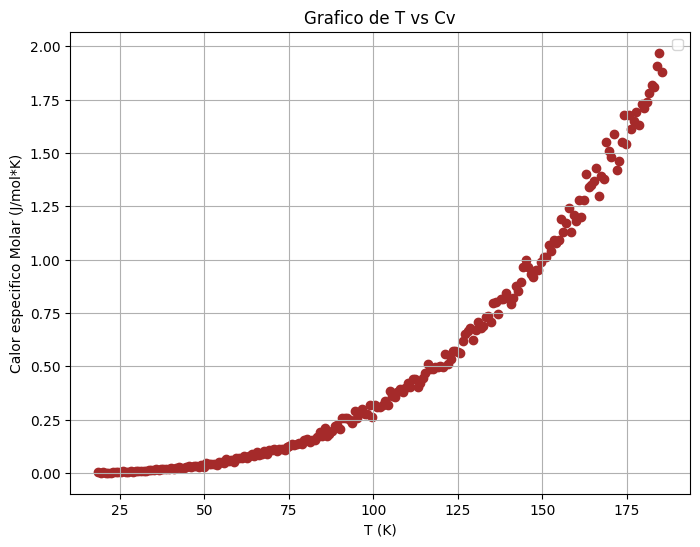

In [27]:
#librerias y otros
import numpy as np
import matplotlib.pyplot as plt
#carga los datos
datos = np.loadtxt ('/Datos_Parcial01_Gr09am(3).dat')

#separa los datos en columnas
T = datos[:,0]
Cv= datos[:,1]
#Grafica T vs Cv
plt.figure (figsize=(8,6))
plt.scatter (T,Cv,color='brown')
plt.xlabel ('T (K)')
plt.ylabel('Calor especifico Molar (J/mol*K)')
plt.title ('Grafico de T vs Cv')
plt.legend ()
plt.grid (True)
plt.show ()

* Punto 2

Mi hipotesis sobre la relacion entre ambas variables es que dicha es del tipo exponencial debio a la curva que forma en la grafica.

---
## **Tercer punto (45%)**
---


En un estudio sobre la propagación de una enfermedad en una población, se recopilaron datos sobre el número de personas infectadas en diferentes momentos.


| Tiempo (días) | Personas infectadas |
|---------------|---------------------|
|0 	|1.000000
|1 	|1.719000
|2 	|2.953725
|3 	|5.071683
|4 	|8.697572
|5 	|14.884176
|6 	|25.379244
|7 	|43.008194
|8 	|72.124389
|9 	|118.852022
|10 |190.299675
|11 |291.101474
|12 |415.954468
|13 |542.423565
|14 |638.745208
|15 |690.646317



<br>

Con la información anterior  realize lo siguiente:

<br>

1. (**5%**)  Grafique los datos de la tabla.

<br>

2. (**15%**) Asumiendo que los datos satisfacen un modelo logistico de la forma
<br>

  $$P_{n+1} = \left(\kappa  - \beta\, P_n \right) P_{n}$$
  Utilize una regresion lineal que le permita encontrar los parametros del modelo tal que prediga los datos de la tabla.

<br>

3. (**5%**) En una gráfica compare el error porcentual de los datos dados con los obtenido con el modelo. El error porcentual se define como:

$$E = 100\,\left|\frac{y_{\rm datos}-y_{\rm modelo}}{y_{\rm datos}}\right|$$



<br>

4. (**10%**) Realice un gráfico en el cual se muestre el comportamiento del modelo para diferentes valores de la constante $\beta$. En particular, muestre las predicciones del modelo en un mismo gráfico para $\beta = 0.001$, $\beta = 0.005$ y $\beta = 0.1$. Utilice para la constante $\kappa$ el mismo valor predicho por la linealización de los datos del punto 2. Explique sus observaciones en un párrafo.

<br>

5. (**10%**)  Realice un gráfico en el cual se muestre el comportamiento del modelo para diferentes valores de la constante $\kappa$. En particular, muestre las predicciones del modelo en un mismo gráfico para $\kappa = 2.0$, $\kappa = 2.8$, $\kappa = 3.0$ y $\kappa = 3.5$. Utilice para la constante $\beta$ el mismo valor predicho por la linealización de los datos del punto 2. Explique sus observaciones en un párrafo.

* Punto 1

<function matplotlib.pyplot.show(close=None, block=None)>

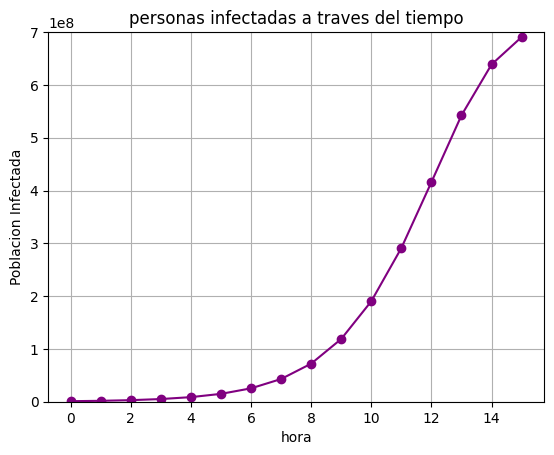

In [28]:
#librerias y otros
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stat
#variables
horas = np.array ([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
P_i= np.array ([1000000,1719000,2953725,5071683,8697572,14884176,25379244,43008194,72124389,118852022,190299675,291101474,415954468,542423565,638745208,690646317])
#Grafica
plt.plot(horas,P_i, color='purple', marker='o')
plt.title('personas infectadas a traves del tiempo')
plt.ylim (0,700000000)
plt.xlabel('hora')
plt.ylabel('Poblacion Infectada')
plt.grid (True)
plt.show

* Punto 2

<ipython-input-66-eddf4a05837e>:17: RuntimeWarning: overflow encountered in scalar multiply
  P_n1= (k-(B*poblacion [-1]))*poblacion[-1]


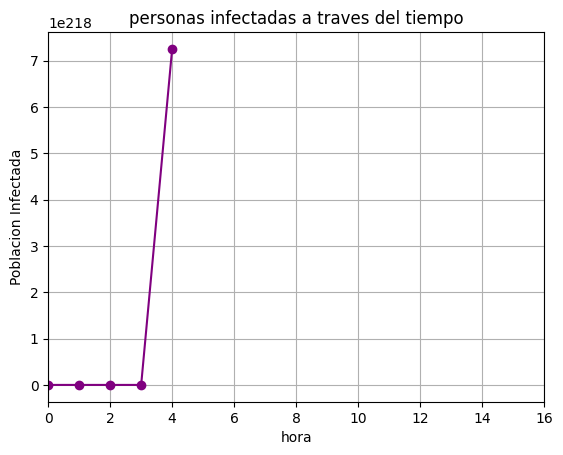

In [66]:
#librerias y otros
from ast import While
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stat
Rlineal=stat.linregress(horas,P_i)
#Variables
k= Rlineal.slope
B= Rlineal.intercept
P_o=1000000
poblacion =[P_o]
hora_actual =0

while hora_actual<15:
#calculo de la poblacion usando el modelo logistico
   P_n1= (k-(B*poblacion [-1]))*poblacion[-1]
   poblacion.append(P_n1)
   hora_actual+=1
   hora =list(range(16))

#Grafica
plt.plot(horas,poblacion, color='purple', marker='o')
plt.title('personas infectadas a traves del tiempo')
plt.xlabel('hora')
plt.xlim(0,16)
plt.ylabel('Poblacion Infectada')
plt.grid (True)
plt.show ()